In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys

In [112]:
fname = 'Airfares.csv'
df = pd.read_csv(fname)

In [113]:
df.head(5)

,S_CODE,S_CITY,E_CODE,E_CITY,COUPON,NEW,VACATION,SW,HI,S_INCOME,E_INCOME,S_POP,E_POP,SLOT,GATE,DISTANCE,PAX,FARE
0,*,Dallas/Fort Worth TX,*,Amarillo TX,1.00,3,No,Yes,5291.99,28637.0,21112.0,3036732,205711,Free,Free,312,7864,64.11
1,*,Atlanta GA,*,Baltimore/Wash Intl MD,1.06,3,No,No,5419.16,26993.0,29838.0,3532657,7145897,Free,Free,576,8820,174.47
2,*,Boston MA,*,Baltimore/Wash Intl MD,1.06,3,No,No,9185.28,30124.0,29838.0,5787293,7145897,Free,Free,364,6452,207.76
3,ORD,Chicago IL,*,Baltimore/Wash Intl MD,1.06,3,No,Yes,2657.35,29260.0,29838.0,7830332,7145897,Controlled,Free,612,25144,85.47
4,MDW,Chicago IL,*,Baltimore/Wash Intl MD,1.06,3,No,Yes,2657.35,29260.0,29838.0,7830332,7145897,Free,Free,612,25144,85.47


In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 638 entries, 0 to 637
Data columns (total 18 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   S_CODE    638 non-null    object 
 1   S_CITY    638 non-null    object 
 2   E_CODE    638 non-null    object 
 3   E_CITY    638 non-null    object 
 4   COUPON    638 non-null    float64
 5   NEW       638 non-null    int64  
 6   VACATION  638 non-null    object 
 7   SW        638 non-null    object 
 8   HI        638 non-null    float64
 9   S_INCOME  638 non-null    float64
 10  E_INCOME  638 non-null    float64
 11  S_POP     638 non-null    int64  
 12  E_POP     638 non-null    int64  
 13  SLOT      638 non-null    object 
 14  GATE      638 non-null    object 
 15  DISTANCE  638 non-null    int64  
 16  PAX       638 non-null    int64  
 17  FARE      638 non-null    float64
dtypes: float64(5), int64(5), object(8)
memory usage: 89.8+ KB


In [115]:
df.groupby('E_CITY')['FARE'].mean()

E_CITY
Amarillo            TX     64.110000
Baltimore/Wash Intl MD    143.054348
Birmingham          AL    113.500000
Boise               ID     69.120000
Boston              MA    210.000000
                             ...    
Tampa               FL    124.542778
Tucson              AZ     51.250000
Tulsa               OK     82.665000
Washington          DC    193.666667
West Palm Beach     FL    129.650000
Name: FARE, Length: 68, dtype: float64

In [116]:
#index is column we want to group by and values is column to summrise, default function is mean. 
#aggfunc can be used to pass a different function

df.pivot_table(values="FARE",index="E_CITY")

,FARE
E_CITY,
Amarillo TX,64.110000
Baltimore/Wash Intl MD,143.054348
Birmingham AL,113.500000
Boise ID,69.120000
Boston MA,210.000000
...,...
Tampa FL,124.542778
Tucson AZ,51.250000
Tulsa OK,82.665000


In [117]:
# example of aggfunc using sum as a function to be applied on value and group by index 
df.pivot_table(values="FARE",index="E_CITY",aggfunc="sum")


,FARE
E_CITY,
Amarillo TX,64.11
Baltimore/Wash Intl MD,3290.25
Birmingham AL,227.00
Boise ID,69.12
Boston MA,210.00
...,...
Tampa FL,2241.77
Tucson AZ,153.75
Tulsa OK,165.33


In [118]:
#group by example of 2 fields 
df.groupby(["S_CITY","E_CITY"])["FARE"].mean()

S_CITY                  E_CITY                
Albuquerque         NM  Dallas/Fort Worth   TX     84.46
                        Las Vegas           NV     72.43
                        Los Angeles         CA     76.79
                        New York/Newark     NY    208.79
                        Phoenix             AZ     57.05
                                                   ...  
Tampa               FL  Indianapolis        IN     99.43
                        Washington          DC    132.94
Washington          DC  Colorado Springs    CO    157.20
                        Raleigh/Durham      NC    109.44
                        West Palm Beach     FL    129.62
Name: FARE, Length: 452, dtype: float64

In [119]:
#using pu=ivottabl to perform row and colunmn grouping
df.pivot_table(values="FARE",index="E_CITY",columns="S_CITY", fill_value=0.00)

S_CITY,Albuquerque NM,Anchorage AK,Atlanta GA,Austin TX,Baltimore/Wash Intl MD,Boise ID,Boston MA,Burbank CA,Chicago IL,Cincinnati OH,...,Sacramento CA,Salt Lake City UT,San Diego CA,San Francisco CA,San Jose CA,Seattle/Tacoma WA,Spokane WA,St Louis MO,Tampa FL,Washington DC
E_CITY,,,,,,,,,,,,,,,,,,,,,
Amarillo TX,0.00,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.00,0.0,...,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.00,0.00,0.00
Baltimore/Wash Intl MD,0.00,0.0,174.47,0.0,0.0,0.0,207.76,0.0,85.47,0.0,...,0.0,157.5,200.20,246.85,0.0,0.00,0.0,99.70,106.77,0.00
Birmingham AL,0.00,0.0,0.00,0.0,0.0,0.0,0.00,0.0,113.50,0.0,...,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.00,0.00,0.00
Boise ID,0.00,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.00,0.0,...,0.0,0.0,0.00,0.00,0.0,69.12,0.0,0.00,0.00,0.00
Boston MA,0.00,0.0,210.00,0.0,0.0,0.0,0.00,0.0,0.00,0.0,...,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Tampa FL,0.00,0.0,87.35,0.0,0.0,0.0,124.82,0.0,127.06,0.0,...,0.0,0.0,0.00,0.00,0.0,0.00,0.0,135.76,0.00,0.00
Tucson AZ,0.00,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.00,0.0,...,0.0,0.0,54.96,0.00,0.0,0.00,0.0,0.00,0.00,0.00
Tulsa OK,0.00,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.00,0.0,...,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.00,0.00,0.00


In [120]:
#margins will add summary for each row and column , ignores fill_value columns
df.pivot_table(values="FARE",index="E_CITY",columns="S_CITY", fill_value=0.00,margins=True)

S_CITY,Albuquerque NM,Anchorage AK,Atlanta GA,Austin TX,Baltimore/Wash Intl MD,Boise ID,Boston MA,Burbank CA,Chicago IL,Cincinnati OH,...,Salt Lake City UT,San Diego CA,San Francisco CA,San Jose CA,Seattle/Tacoma WA,Spokane WA,St Louis MO,Tampa FL,Washington DC,All
E_CITY,,,,,,,,,,,,,,,,,,,,,
Amarillo TX,0.000000,0.00,0.000000,0.000,0.00,0.00,0.000000,0.000000,0.000000,0.000000,...,0.00,0.000000,0.00000,0.000,0.000000,0.00,0.00,0.00,0.000000,64.110000
Baltimore/Wash Intl MD,0.000000,0.00,174.470000,0.000,0.00,0.00,207.760000,0.000000,85.470000,0.000000,...,157.50,200.200000,246.85000,0.000,0.000000,0.00,99.70,106.77,0.000000,143.054348
Birmingham AL,0.000000,0.00,0.000000,0.000,0.00,0.00,0.000000,0.000000,113.500000,0.000000,...,0.00,0.000000,0.00000,0.000,0.000000,0.00,0.00,0.00,0.000000,113.500000
Boise ID,0.000000,0.00,0.000000,0.000,0.00,0.00,0.000000,0.000000,0.000000,0.000000,...,0.00,0.000000,0.00000,0.000,69.120000,0.00,0.00,0.00,0.000000,69.120000
Boston MA,0.000000,0.00,210.000000,0.000,0.00,0.00,0.000000,0.000000,0.000000,0.000000,...,0.00,0.000000,0.00000,0.000,0.000000,0.00,0.00,0.00,0.000000,210.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Tucson AZ,0.000000,0.00,0.000000,0.000,0.00,0.00,0.000000,0.000000,0.000000,0.000000,...,0.00,54.960000,0.00000,0.000,0.000000,0.00,0.00,0.00,0.000000,51.250000
Tulsa OK,0.000000,0.00,0.000000,0.000,0.00,0.00,0.000000,0.000000,0.000000,0.000000,...,0.00,0.000000,0.00000,0.000,0.000000,0.00,0.00,0.00,0.000000,82.665000
Washington DC,215.570000,0.00,166.670000,0.000,0.00,0.00,132.790000,0.000000,145.610000,0.000000,...,0.00,273.830000,347.82000,0.000,281.060000,0.00,258.37,132.94,0.000000,193.666667


In [121]:
#index is row number
df.index

RangeIndex(start=0, stop=638, step=1)

In [122]:
#columns is header row
df.columns

Index(['S_CODE', 'S_CITY', 'E_CODE', 'E_CITY', 'COUPON', 'NEW', 'VACATION',
       'SW', 'HI', 'S_INCOME', 'E_INCOME', 'S_POP', 'E_POP', 'SLOT', 'GATE',
       'DISTANCE', 'PAX', 'FARE'],
      dtype='object')

In [123]:
df.set_index("S_CITY")

,S_CODE,E_CODE,E_CITY,COUPON,NEW,VACATION,SW,HI,S_INCOME,E_INCOME,S_POP,E_POP,SLOT,GATE,DISTANCE,PAX,FARE
S_CITY,,,,,,,,,,,,,,,,,
Dallas/Fort Worth TX,*,*,Amarillo TX,1.00,3,No,Yes,5291.99,28637.0,21112.0,3036732,205711,Free,Free,312,7864,64.11
Atlanta GA,*,*,Baltimore/Wash Intl MD,1.06,3,No,No,5419.16,26993.0,29838.0,3532657,7145897,Free,Free,576,8820,174.47
Boston MA,*,*,Baltimore/Wash Intl MD,1.06,3,No,No,9185.28,30124.0,29838.0,5787293,7145897,Free,Free,364,6452,207.76
Chicago IL,ORD,*,Baltimore/Wash Intl MD,1.06,3,No,Yes,2657.35,29260.0,29838.0,7830332,7145897,Controlled,Free,612,25144,85.47
Chicago IL,MDW,*,Baltimore/Wash Intl MD,1.06,3,No,Yes,2657.35,29260.0,29838.0,7830332,7145897,Free,Free,612,25144,85.47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
New York/Newark NY,LGA,*,West Palm Beach FL,1.08,3,Yes,No,2216.70,32991.0,37375.0,8621121,991717,Controlled,Free,1030,34324,129.63
New York/Newark NY,EWR,*,West Palm Beach FL,1.08,0,Yes,No,2216.70,32991.0,37375.0,8621121,991717,Free,Constrained,1030,34324,129.63
Philadelphia/Camden PA,*,*,West Palm Beach FL,1.17,3,Yes,No,6797.80,27994.0,37375.0,4948339,991717,Free,Free,960,6016,124.87


In [124]:
#setting another column as index 
df_S_CITY= df.set_index("S_CITY")

In [125]:
#slicing based on index value, index id not required to be unique 
print(df_S_CITY.loc["Boston              MA"])

                       S_CODE E_CODE                  E_CITY  COUPON  NEW  \
S_CITY                                                                      
Boston              MA      *      *  Baltimore/Wash Intl MD    1.06    3   
Boston              MA      *      *  Charlotte           NC    1.25    3   
Boston              MA      *    ORD  Chicago             IL    1.15    1   
Boston              MA      *    MDW  Chicago             IL    1.15    3   
Boston              MA      *      *  Columbus            OH    1.22    3   
Boston              MA      *      *  Dallas/Fort Worth   TX    1.19    3   
Boston              MA      *      *  Denver              CO    1.35    3   
Boston              MA      *      *  Detroit             MI    1.06    3   
Boston              MA      *      *  Fort Lauderdale     FL    1.27    3   
Boston              MA      *      *  Fort Meyers         FL    1.47    3   
Boston              MA      *      *  Houston             TX    1.41    3   

In [126]:
#multiple columns can also be set as index
df_S_CITY_E_CITY = df.set_index(["S_CITY","E_CITY"]).sort_index()
print(df_S_CITY_E_CITY.index)

MultiIndex([('Albuquerque         NM', 'Dallas/Fort Worth   TX'),
            ('Albuquerque         NM', 'Las Vegas           NV'),
            ('Albuquerque         NM', 'Los Angeles         CA'),
            ('Albuquerque         NM', 'New York/Newark     NY'),
            ('Albuquerque         NM', 'New York/Newark     NY'),
            ('Albuquerque         NM', 'New York/Newark     NY'),
            ('Albuquerque         NM', 'Phoenix             AZ'),
            ('Albuquerque         NM', 'Washington          DC'),
            ('Albuquerque         NM', 'Washington          DC'),
            ('Anchorage           AK', 'Seattle/Tacoma      WA'),
            ...
            ('Tampa               FL', 'Baltimore/Wash Intl MD'),
            ('Tampa               FL', 'Indianapolis        IN'),
            ('Tampa               FL', 'Washington          DC'),
            ('Tampa               FL', 'Washington          DC'),
            ('Washington          DC', 'Colorado Springs    

In [127]:
#using multi index values both should be in given as a tupple
print(df_S_CITY_E_CITY.loc[[('Tampa               FL','Baltimore/Wash Intl MD')]])

                                              S_CODE E_CODE  COUPON  NEW  \
S_CITY                 E_CITY                                              
Tampa               FL Baltimore/Wash Intl MD      *      *    1.13    3   

                                              VACATION   SW       HI  \
S_CITY                 E_CITY                                          
Tampa               FL Baltimore/Wash Intl MD      Yes  Yes  5201.34   

                                               S_INCOME  E_INCOME    S_POP  \
S_CITY                 E_CITY                                                
Tampa               FL Baltimore/Wash Intl MD   23654.0   29838.0  2195215   

                                                 E_POP  SLOT  GATE  DISTANCE  \
S_CITY                 E_CITY                                                  
Tampa               FL Baltimore/Wash Intl MD  7145897  Free  Free       846   

                                                PAX    FARE  
S_CITY          

In [128]:
print(df_S_CITY_E_CITY.sort_index(ascending=False,))
?df.sort_index

                                              S_CODE E_CODE  COUPON  NEW  \
S_CITY                 E_CITY                                              
Washington          DC West Palm Beach     FL    IAD      *    1.28    3   
                       West Palm Beach     FL    DCA      *    1.28    3   
                       Raleigh/Durham      NC    IAD      *    1.01    3   
                       Raleigh/Durham      NC    DCA      *    1.01    3   
                       Colorado Springs    CO    IAD      *    1.68    3   
...                                              ...    ...     ...  ...   
Albuquerque         NM New York/Newark     NY      *    LGA    1.92    3   
                       New York/Newark     NY      *    EWR    1.92    3   
                       Los Angeles         CA      *      *    1.09    3   
                       Las Vegas           NV      *      *    1.08    0   
                       Dallas/Fort Worth   TX      *      *    1.02    3   

           

Signature:
df.sort_index(
    axis: 'Axis' = 0,
    level: 'Level | None' = None,
    ascending: 'bool | int | Sequence[bool | int]' = True,
    inplace: 'bool' = False,
    kind: 'str' = 'quicksort',
    na_position: 'str' = 'last',
    sort_remaining: 'bool' = True,
    ignore_index: 'bool' = False,
    key: 'IndexKeyFunc' = None,
)
Docstring:
Sort object by labels (along an axis).

Returns a new DataFrame sorted by label if `inplace` argument is
``False``, otherwise updates the original DataFrame and returns None.

Parameters
----------
axis : {0 or 'index', 1 or 'columns'}, default 0
    The axis along which to sort.  The value 0 identifies the rows,
    and 1 identifies the columns.
level : int or level name or list of ints or list of level names
    If not None, sort on values in specified index level(s).
ascending : bool or list-like of bools, default True
    Sort ascending vs. descending. When the index is a MultiIndex the
    sort direction can be controlled for each level in

In [129]:
df_S_CITY.head(5)

,S_CODE,E_CODE,E_CITY,COUPON,NEW,VACATION,SW,HI,S_INCOME,E_INCOME,S_POP,E_POP,SLOT,GATE,DISTANCE,PAX,FARE
S_CITY,,,,,,,,,,,,,,,,,
Dallas/Fort Worth TX,*,*,Amarillo TX,1.00,3,No,Yes,5291.99,28637.0,21112.0,3036732,205711,Free,Free,312,7864,64.11
Atlanta GA,*,*,Baltimore/Wash Intl MD,1.06,3,No,No,5419.16,26993.0,29838.0,3532657,7145897,Free,Free,576,8820,174.47
Boston MA,*,*,Baltimore/Wash Intl MD,1.06,3,No,No,9185.28,30124.0,29838.0,5787293,7145897,Free,Free,364,6452,207.76
Chicago IL,ORD,*,Baltimore/Wash Intl MD,1.06,3,No,Yes,2657.35,29260.0,29838.0,7830332,7145897,Controlled,Free,612,25144,85.47
Chicago IL,MDW,*,Baltimore/Wash Intl MD,1.06,3,No,Yes,2657.35,29260.0,29838.0,7830332,7145897,Free,Free,612,25144,85.47


In [130]:
df_S_INCOME = df.set_index("S_INCOME").sort_index()
print(df_S_INCOME)

         S_CODE                  S_CITY E_CODE                  E_CITY  \
S_INCOME                                                                 
14600.0       *  El Paso             TX      *  Phoenix             AZ   
18933.0       *  Corpus Christi      TX      *  Dallas/Fort Worth   TX   
18933.0       *  Corpus Christi      TX      *  Houston             TX   
21081.0       *  Greenville/Sprtnbg  SC    EWR  New York/Newark     NY   
21081.0       *  Greenville/Sprtnbg  SC    LGA  New York/Newark     NY   
...         ...                     ...    ...                     ...   
38813.0       *  San Francisco       CA      *  Salt Lake City      UT   
38813.0       *  San Francisco       CA      *  Honolulu (Intl)     HI   
38813.0       *  San Francisco       CA      *  San Diego           CA   
38813.0       *  San Francisco       CA      *  Indianapolis        IN   
38813.0       *  San Francisco       CA    DCA  Washington          DC   

          COUPON  NEW VACATION   SW  

In [131]:
#slicing data frame based on index value 
print(df_S_INCOME.index)
print(df_S_INCOME.loc[14400.0:21000])

Float64Index([14600.0, 18933.0, 18933.0, 21081.0, 21081.0, 21081.0, 21121.0,
              21121.0, 21125.0, 21125.0,
              ...
              34880.0, 34880.0, 38813.0, 38813.0, 38813.0, 38813.0, 38813.0,
              38813.0, 38813.0, 38813.0],
             dtype='float64', name='S_INCOME', length=638)
         S_CODE                  S_CITY E_CODE                  E_CITY  \
S_INCOME                                                                 
14600.0       *  El Paso             TX      *  Phoenix             AZ   
18933.0       *  Corpus Christi      TX      *  Dallas/Fort Worth   TX   
18933.0       *  Corpus Christi      TX      *  Houston             TX   

          COUPON  NEW VACATION   SW       HI  E_INCOME   S_POP    E_POP  SLOT  \
S_INCOME                                                                        
14600.0     1.00    3       No  Yes  7231.62   23025.0  677757  2753373  Free   
18933.0     1.02    3       No  Yes  4386.55   28637.0  382155  3036732 

In [132]:
import pandas as pd

In [133]:
airfare_df = pd.read_csv('Airfares.csv')

In [134]:
airfare_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 638 entries, 0 to 637
Data columns (total 18 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   S_CODE    638 non-null    object 
 1   S_CITY    638 non-null    object 
 2   E_CODE    638 non-null    object 
 3   E_CITY    638 non-null    object 
 4   COUPON    638 non-null    float64
 5   NEW       638 non-null    int64  
 6   VACATION  638 non-null    object 
 7   SW        638 non-null    object 
 8   HI        638 non-null    float64
 9   S_INCOME  638 non-null    float64
 10  E_INCOME  638 non-null    float64
 11  S_POP     638 non-null    int64  
 12  E_POP     638 non-null    int64  
 13  SLOT      638 non-null    object 
 14  GATE      638 non-null    object 
 15  DISTANCE  638 non-null    int64  
 16  PAX       638 non-null    int64  
 17  FARE      638 non-null    float64
dtypes: float64(5), int64(5), object(8)
memory usage: 89.8+ KB


In [135]:
airfare_df.head(5)

,S_CODE,S_CITY,E_CODE,E_CITY,COUPON,NEW,VACATION,SW,HI,S_INCOME,E_INCOME,S_POP,E_POP,SLOT,GATE,DISTANCE,PAX,FARE
0,*,Dallas/Fort Worth TX,*,Amarillo TX,1.00,3,No,Yes,5291.99,28637.0,21112.0,3036732,205711,Free,Free,312,7864,64.11
1,*,Atlanta GA,*,Baltimore/Wash Intl MD,1.06,3,No,No,5419.16,26993.0,29838.0,3532657,7145897,Free,Free,576,8820,174.47
2,*,Boston MA,*,Baltimore/Wash Intl MD,1.06,3,No,No,9185.28,30124.0,29838.0,5787293,7145897,Free,Free,364,6452,207.76
3,ORD,Chicago IL,*,Baltimore/Wash Intl MD,1.06,3,No,Yes,2657.35,29260.0,29838.0,7830332,7145897,Controlled,Free,612,25144,85.47
4,MDW,Chicago IL,*,Baltimore/Wash Intl MD,1.06,3,No,Yes,2657.35,29260.0,29838.0,7830332,7145897,Free,Free,612,25144,85.47


In [136]:
airfare_df.columns

Index(['S_CODE', 'S_CITY', 'E_CODE', 'E_CITY', 'COUPON', 'NEW', 'VACATION',
       'SW', 'HI', 'S_INCOME', 'E_INCOME', 'S_POP', 'E_POP', 'SLOT', 'GATE',
       'DISTANCE', 'PAX', 'FARE'],
      dtype='object')

In [137]:
#changing name of one specific column
airfare_df = airfare_df.rename(columns={'E_CODE':'ECode'})

In [138]:
airfare_df.columns

Index(['S_CODE', 'S_CITY', 'ECode', 'E_CITY', 'COUPON', 'NEW', 'VACATION',
       'SW', 'HI', 'S_INCOME', 'E_INCOME', 'S_POP', 'E_POP', 'SLOT', 'GATE',
       'DISTANCE', 'PAX', 'FARE'],
      dtype='object')

In [139]:
#changing all column headings
airfare_df.columns = [s.strip().replace('_','=') for s in airfare_df.columns]

In [140]:
airfare_df.columns

Index(['S=CODE', 'S=CITY', 'ECode', 'E=CITY', 'COUPON', 'NEW', 'VACATION',
       'SW', 'HI', 'S=INCOME', 'E=INCOME', 'S=POP', 'E=POP', 'SLOT', 'GATE',
       'DISTANCE', 'PAX', 'FARE'],
      dtype='object')

In [141]:
#show first 4 rows of dataset loc gives rows a to b and iloc gives a to b-1
print(airfare_df.loc[0:3])
print(airfare_df.iloc[0:4])

  S=CODE                  S=CITY ECode                  E=CITY  COUPON  NEW  \
0      *  Dallas/Fort Worth   TX     *  Amarillo            TX    1.00    3   
1      *  Atlanta             GA     *  Baltimore/Wash Intl MD    1.06    3   
2      *  Boston              MA     *  Baltimore/Wash Intl MD    1.06    3   
3    ORD  Chicago             IL     *  Baltimore/Wash Intl MD    1.06    3   

  VACATION   SW       HI  S=INCOME  E=INCOME    S=POP    E=POP        SLOT  \
0       No  Yes  5291.99   28637.0   21112.0  3036732   205711        Free   
1       No   No  5419.16   26993.0   29838.0  3532657  7145897        Free   
2       No   No  9185.28   30124.0   29838.0  5787293  7145897        Free   
3       No  Yes  2657.35   29260.0   29838.0  7830332  7145897  Controlled   

   GATE  DISTANCE    PAX    FARE  
0  Free       312   7864   64.11  
1  Free       576   8820  174.47  
2  Free       364   6452  207.76  
3  Free       612  25144   85.47  
  S=CODE                  S=CITY ECode

In [142]:
import matplotlib.pyplot as plt
import pandas as pd

In [143]:
airfare = pd.read_csv('Airfares.csv')

In [144]:
airfare.head(2)

,S_CODE,S_CITY,E_CODE,E_CITY,COUPON,NEW,VACATION,SW,HI,S_INCOME,E_INCOME,S_POP,E_POP,SLOT,GATE,DISTANCE,PAX,FARE
0,*,Dallas/Fort Worth TX,*,Amarillo TX,1.00,3,No,Yes,5291.99,28637.0,21112.0,3036732,205711,Free,Free,312,7864,64.11
1,*,Atlanta GA,*,Baltimore/Wash Intl MD,1.06,3,No,No,5419.16,26993.0,29838.0,3532657,7145897,Free,Free,576,8820,174.47


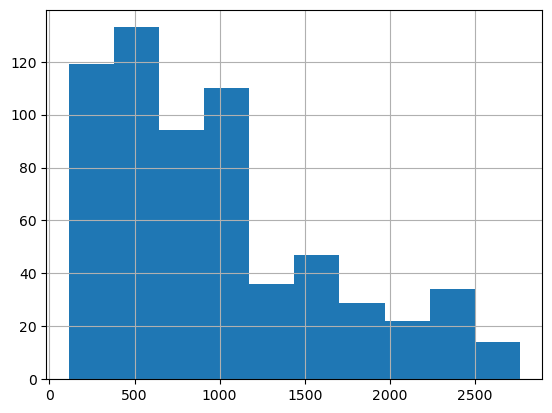

In [145]:
airfare['DISTANCE'].hist()
plt.show()

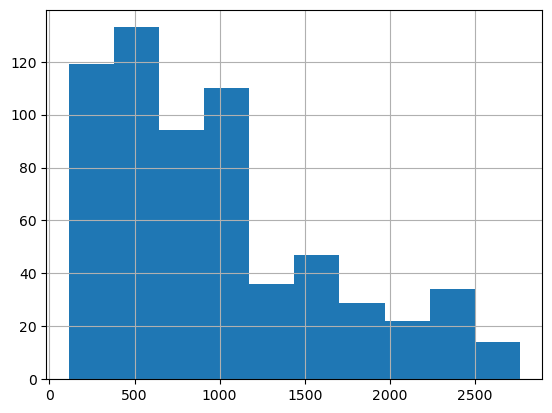

In [146]:
airfare['DISTANCE'].hist(bins=10)
plt.show()

S_CITY
Albuquerque         NM    1200.444444
Anchorage           AK    1443.000000
Atlanta             GA     798.780488
Austin              TX    1025.100000
Baltimore/Wash Intl MD     411.500000
Boise               ID     344.000000
Boston              MA    1216.774194
Burbank             CA     404.857143
Chicago             IL     891.377778
Cincinnati          OH     501.666667
Cleveland           OH     968.600000
Columbus            OH     911.900000
Corpus Christi      TX     269.000000
Dallas/Fort Worth   TX     879.083333
Denver              CO    1028.909091
Detroit             MI     949.954545
El Paso             TX     353.000000
Fort Lauderdale     FL     901.727273
Fort Meyers         FL    1042.750000
Greenville/Sprtnbg  SC     613.000000
Hartford            CT     781.600000
Honolulu (Intl)     HI    2603.000000
Houston             TX     979.000000
Jacksonville        FL     842.000000
Kansas City         MO     945.272727
Las Vegas           NV    1199.192308
Los A

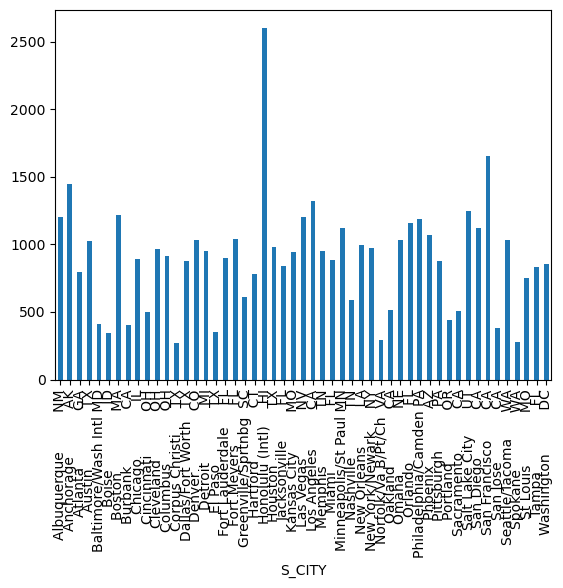

In [147]:
airfare_mean_distance = airfare.groupby('S_CITY')['DISTANCE'].mean()
print(airfare_mean_distance)
airfare_mean_distance.plot(kind="bar")
plt.show()

In [148]:
airfare_newidx = airfare.set_index("S_CITY")
airfare_newidx.head(5)

,S_CODE,E_CODE,E_CITY,COUPON,NEW,VACATION,SW,HI,S_INCOME,E_INCOME,S_POP,E_POP,SLOT,GATE,DISTANCE,PAX,FARE
S_CITY,,,,,,,,,,,,,,,,,
Dallas/Fort Worth TX,*,*,Amarillo TX,1.00,3,No,Yes,5291.99,28637.0,21112.0,3036732,205711,Free,Free,312,7864,64.11
Atlanta GA,*,*,Baltimore/Wash Intl MD,1.06,3,No,No,5419.16,26993.0,29838.0,3532657,7145897,Free,Free,576,8820,174.47
Boston MA,*,*,Baltimore/Wash Intl MD,1.06,3,No,No,9185.28,30124.0,29838.0,5787293,7145897,Free,Free,364,6452,207.76
Chicago IL,ORD,*,Baltimore/Wash Intl MD,1.06,3,No,Yes,2657.35,29260.0,29838.0,7830332,7145897,Controlled,Free,612,25144,85.47
Chicago IL,MDW,*,Baltimore/Wash Intl MD,1.06,3,No,Yes,2657.35,29260.0,29838.0,7830332,7145897,Free,Free,612,25144,85.47


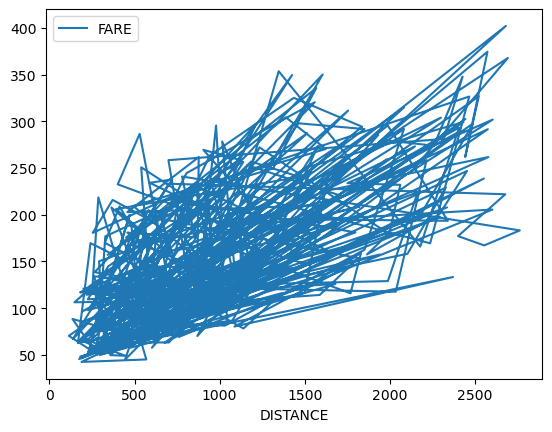

In [149]:
airfare_newidx.loc["Boston              MA"]
airfare_newidx.plot(x="DISTANCE", y = "FARE", kind="line")
plt.show()

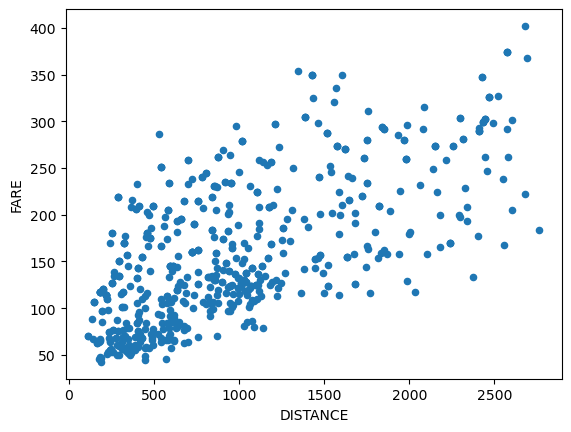

In [150]:
airfare_newidx.loc["Boston              MA"]
airfare_newidx.plot(x="DISTANCE", y = "FARE", kind="scatter")
##plt.legends(['DISTANCE','FARE'])
plt.show()

In [151]:
gdp = pd.read_csv("gdp.csv")
gdp.info()
gdp.isna()
gdp.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 268 entries, 0 to 267
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    267 non-null    object 
 1   World Development Indicators  266 non-null    object 
 2   Unnamed: 2                    265 non-null    object 
 3   Unnamed: 3                    265 non-null    object 
 4   Unnamed: 4                    216 non-null    float64
dtypes: float64(1), object(4)
memory usage: 10.6+ KB


Unnamed: 0                       1
World Development Indicators     2
Unnamed: 2                       3
Unnamed: 3                       3
Unnamed: 4                      52
dtype: int64

In [152]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys

In [4]:
cust_data = pd.read_csv("global_sales_data/cust_dimen.csv")
cust_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1832 entries, 0 to 1831
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Customer_Name     1832 non-null   object
 1   Province          1832 non-null   object
 2   Region            1832 non-null   object
 3   Customer_Segment  1832 non-null   object
 4   Cust_id           1832 non-null   object
dtypes: object(5)
memory usage: 71.7+ KB


In [154]:
order_data = pd.read_csv("global_sales_data/orders_dimen.csv")
order_data.info()
order_data.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5506 entries, 0 to 5505
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Order_ID        5506 non-null   int64 
 1   Order_Date      5506 non-null   object
 2   Order_Priority  5506 non-null   object
 3   Ord_id          5506 non-null   object
dtypes: int64(1), object(3)
memory usage: 172.2+ KB


,Order_ID,Order_Date,Order_Priority,Ord_id
0,3,13-10-2010,LOW,Ord_1
1,293,01-10-2012,HIGH,Ord_2
2,483,10-07-2011,HIGH,Ord_3
3,515,28-08-2010,NOT SPECIFIED,Ord_4
4,613,17-06-2011,HIGH,Ord_5


In [5]:
market_data  = pd.read_csv("global_sales_data/market_fact.csv")
market_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8399 entries, 0 to 8398
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Ord_id               8399 non-null   object 
 1   Prod_id              8399 non-null   object 
 2   Ship_id              8399 non-null   object 
 3   Cust_id              8399 non-null   object 
 4   Sales                8399 non-null   float64
 5   Discount             8399 non-null   float64
 6   Order_Quantity       8399 non-null   int64  
 7   Profit               8399 non-null   float64
 8   Shipping_Cost        8399 non-null   float64
 9   Product_Base_Margin  8336 non-null   float64
dtypes: float64(5), int64(1), object(4)
memory usage: 656.3+ KB


In [156]:
customer_order = cust_data.merge(market_data,on='Cust_id',suffixes=('_cust','_market'))
customer_order.head(5)

,Customer_Name,Province,Region,Customer_Segment,Cust_id,Ord_id,Prod_id,Ship_id,Sales,Discount,Order_Quantity,Profit,Shipping_Cost,Product_Base_Margin
0,MUHAMMED MACINTYRE,NUNAVUT,NUNAVUT,SMALL BUSINESS,Cust_1,Ord_1,Prod_1,SHP_1,261.5400,0.04,6,-213.25,35.00,0.80
1,BARRY FRENCH,NUNAVUT,NUNAVUT,CONSUMER,Cust_2,Ord_2,Prod_3,SHP_3,244.5700,0.01,27,46.71,2.99,0.39
2,BARRY FRENCH,NUNAVUT,NUNAVUT,CONSUMER,Cust_2,Ord_2,Prod_2,SHP_2,10123.0200,0.07,49,457.81,68.02,0.58
3,CLAY ROZENDAL,NUNAVUT,NUNAVUT,CORPORATE,Cust_3,Ord_3,Prod_4,SHP_4,4965.7595,0.08,30,1198.97,3.99,0.58
4,CLAY ROZENDAL,NUNAVUT,NUNAVUT,CORPORATE,Cust_3,Ord_35,Prod_8,SHP_47,1285.3700,0.10,42,514.07,1.99,0.42


In [157]:
#df.groupby('E_CITY')['FARE'].mean()

customer_order.groupby('Cust_id')['Sales'].count()

Cust_id
Cust_1        1
Cust_10       1
Cust_100      6
Cust_1000     7
Cust_1001    10
             ..
Cust_995     12
Cust_996      5
Cust_997     10
Cust_998      4
Cust_999     20
Name: Sales, Length: 1832, dtype: int64

In [158]:
customer_order['Cust_id'].value_counts()

Cust_1140    30
Cust_1329    22
Cust_444     21
Cust_572     21
Cust_942     20
             ..
Cust_881      1
Cust_882      1
Cust_883      1
Cust_885      1
Cust_917      1
Name: Cust_id, Length: 1832, dtype: int64

In [159]:
movies = pd.read_csv("movies.csv")
movies.info()

movies.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       100 non-null    object
 1   type          100 non-null    object
 2   title         100 non-null    object
 3   director      62 non-null     object
 4   cast          89 non-null     object
 5   country       60 non-null     object
 6   date_added    100 non-null    object
 7   release_year  100 non-null    int64 
 8   rating        100 non-null    object
 9   duration      100 non-null    object
 10  listed_in     100 non-null    object
 11  description   100 non-null    object
dtypes: int64(1), object(11)
memory usage: 9.5+ KB


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [161]:
market_order_data = market_data.merge(order_data,left_on='Ord_id',right_on = 'Ord_id',suffixes=('_market','_order'))
print(market_order_data.head(5))

     Ord_id  Prod_id   Ship_id    Cust_id    Sales  Discount  Order_Quantity  \
0  Ord_5446  Prod_16  SHP_7609  Cust_1818   136.81      0.01              23   
1  Ord_5446   Prod_4  SHP_7610  Cust_1818  4701.69      0.00              26   
2  Ord_5446   Prod_6  SHP_7608  Cust_1818   164.02      0.03              23   
3  Ord_5406  Prod_13  SHP_7549  Cust_1818    42.27      0.01              13   
4  Ord_5456   Prod_6  SHP_7625  Cust_1818  2337.89      0.09              43   

    Profit  Shipping_Cost  Product_Base_Margin  Order_ID  Order_Date  \
0   -30.51           3.60                 0.56     36262  27-07-2010   
1  1148.90           2.50                 0.59     36262  27-07-2010   
2   -47.64           6.15                 0.37     36262  27-07-2010   
3     4.56           0.93                 0.54     20513  07-07-2009   
4   729.34          14.30                 0.37     39682  09-11-2010   

  Order_Priority  
0  NOT SPECIFIED  
1  NOT SPECIFIED  
2  NOT SPECIFIED  
3         

In [2]:
movies = pd.read_csv("movies.csv")
movies.info()
movies.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       100 non-null    object
 1   type          100 non-null    object
 2   title         100 non-null    object
 3   director      62 non-null     object
 4   cast          89 non-null     object
 5   country       60 non-null     object
 6   date_added    100 non-null    object
 7   release_year  100 non-null    int64 
 8   rating        100 non-null    object
 9   duration      100 non-null    object
 10  listed_in     100 non-null    object
 11  description   100 non-null    object
dtypes: int64(1), object(11)
memory usage: 9.5+ KB


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [3]:
movies.set_index('show_id',inplace=True)
movies.head(5)

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
show_id,,,,,,,,,,,
s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
#semi join only returns rows that have a match in both tables, it does not add columns from the right table like normal inner join
#example we want list of customers which have placed orders
#inner join will return all columns from both tables where there is a match
customer_order_semi = cust_data.merge(market_data,on='Cust_id',how='inner',suffixes=('_cust','_market'))
customer_order_semi.head(5)

#semi join for same query 
customer_order_semi = cust_data[cust_data['Cust_id'].isin(market_data['Cust_id'])]
customer_order_semi.head(5)

#isin returns boolean series which is then used to filter cust_data

,Customer_Name,Province,Region,Customer_Segment,Cust_id
0,MUHAMMED MACINTYRE,NUNAVUT,NUNAVUT,SMALL BUSINESS,Cust_1
1,BARRY FRENCH,NUNAVUT,NUNAVUT,CONSUMER,Cust_2
2,CLAY ROZENDAL,NUNAVUT,NUNAVUT,CORPORATE,Cust_3
3,CARLOS SOLTERO,NUNAVUT,NUNAVUT,CONSUMER,Cust_4
4,CARL JACKSON,NUNAVUT,NUNAVUT,CORPORATE,Cust_5


In [20]:
#anti join returns rows from left table which do not have a match in right table
#indicate=True adds a column _merge which tells if row is from left only, right only or both
customer_order_anti = cust_data.merge(market_data,on='Cust_id',how='left',indicator=True)

customer_order_anti = customer_order_anti[customer_order_anti['_merge']=='left_only']
customer_order_anti = cust_data[~cust_data['Cust_id'].isin(market_data['Cust_id'])]
#customer_order_anti.head(5)

In [4]:
def first_func(*args):
    print(args)

first_func(1,2,3)


def second_func(**kargs):
    print(kargs)
    for key in kargs:
        print(f"key={key}, value={kargs[key]}")

second_func(a=1,b=2,c=3)


(1, 2, 3)
{'a': 1, 'b': 2, 'c': 3}
key=a, value=1
key=b, value=2
key=c, value=3


In [2]:
##lambda function


# Create a list of strings: spells
spells = ['protego', 'accio', 'expecto patronum', 'legilimens']

# Use map() to apply a lambda function over spells: shout_spells
shout_spells = map(lambda item: item + '!!!', spells)

# Convert shout_spells to a list: shout_spells_list
shout_spells_list = list(shout_spells)

# Print the result
print(shout_spells_list)

['protego!!!', 'accio!!!', 'expecto patronum!!!', 'legilimens!!!']


In [8]:
def sqrt(x):
    if x < 0:
        raise NegNumberErrror("Cannot compute square root of negative number")
    try:
        return x ** 0.5
    except TypeError:
        print('Xmust be numeric')

print(sqrt(16))
##print(sqrt(-16))
print(sqrt('sm'))

4.0


TypeError: '<' not supported between instances of 'str' and 'int'

In [23]:
import pandas as pd
import numpy as np

test_dict = {}
test_dict["name"] = []
test_dict["name"].append("test1")
test_dict["age"] = []
test_dict["age"].append(30)

print(test_dict)  # {'name': ['test1'], 'age': [30]}

# Append more data
test_dict["name"].append("test_2")
test_dict["age"].append(25)

print(test_dict)  # {'name': ['test1', 'test_2'], 'age': [30, 25]}


for key, value in test_dict.items():
    print(f"key={key}, value={value}")
    if key == "name":
        for name in value:
            print(name)

## enumerate is function which can be applied on any iterable and returns index and value as tuple
print(test_dict.items)
test_dict_enumerated = enumerate(test_dict.items(), start=1)
for index, (key, value) in test_dict_enumerated:
    print(f"Index={index}, key={key}, value={value}")

{'name': ['test1'], 'age': [30]}
{'name': ['test1', 'test_2'], 'age': [30, 25]}
key=name, value=['test1', 'test_2']
test1
test_2
key=age, value=[30, 25]
<built-in method items of dict object at 0x7fea20629940>
Index=1, key=name, value=['test1', 'test_2']
Index=2, key=age, value=[30, 25]


In [47]:
##zip function combines multiple iterables into one iterable of tuples
names = ['Alice', 'Bob', 'Charlie']
ages = [25, 30,67]
zipped = zip(names, ages)
for name, age in zipped:
    print(f"Name: {name}, Age: {age}")

##unzip is done by using * operator in front of zipped object
names = ['Alice', 'Bob', 'Charlie']
ages = [25, 30,67]
zipped = zip(names, ages)

unzipped_names, unzipped_ages = zip(*zipped)
print("Unzipped Names:", unzipped_names)
print("Unzipped Ages:", unzipped_ages)


Name: Alice, Age: 25
Name: Bob, Age: 30
Name: Charlie, Age: 67
Unzipped Names: ('Alice', 'Bob', 'Charlie')
Unzipped Ages: (25, 30, 67)


In [3]:
# Create a 5 x 5 matrix using a list of lists: matrix
# list comprehension used to create 5x5   matrix
matrix = [[col for col in range(5)] for row in range(5)]

# Print the matrix
for row in matrix:
    print(row)

a = [1,2,3,4]

b = [ item +1 for item in a]
print(b)

[0, 1, 2, 3, 4]
[0, 1, 2, 3, 4]
[0, 1, 2, 3, 4]
[0, 1, 2, 3, 4]
[0, 1, 2, 3, 4]
[2, 3, 4, 5]
